In [1]:
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar
from pynamix import io, data, measure, color, plotting, exposure
%matplotlib inline

In [2]:
data_dir = '/Volumes/LTS/DynamiX/'
# data_dir = '/Volumes/research-data/'

size = '14mm'
detector = 'D1'

fg_threshold=False
bg_threshold=False

if size == '25mm' and detector == 'D1':
    bg_threshold=157.05
elif size == '14mm' and detector == 'D1':
    bg_threshold = 157.2


In [3]:
fg_ims,fg_logfile = io.load_seq(data_dir + 'PRJ-RRCV/2021-04-06/' + size + '/FilledCylinderWithBlade-' + detector)
bg_ims,bg_logfile = io.load_seq(data_dir + 'PRJ-RRCV/2021-04-06/' + size + '/EmptyCylinderWithBlade-' + detector)

Total number of frames: 314
Start frame: 8. End frame: 307


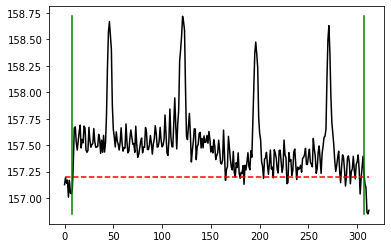

In [4]:
bg_logfile = exposure.set_motion_limits(bg_ims,bg_logfile,verbose=True,threshold=bg_threshold)
bg_logfile = exposure.set_angles_from_limits(bg_logfile,max_angle=360)

Total number of frames: 1522
Start frame: 10. End frame: 1511


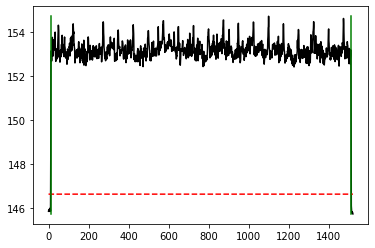

In [5]:
fg_logfile = exposure.set_motion_limits(fg_ims,fg_logfile,verbose=True,threshold=fg_threshold)
fg_logfile = exposure.set_angles_from_limits(fg_logfile,max_angle=1800)

In [6]:
normed_ims = exposure.normalise_rotation(fg_ims, fg_logfile, bg_ims, bg_logfile)#, verbose=True)

100% (1501 of 1501) |####################| Elapsed Time: 0:10:01 Time:  0:10:01


In [7]:
io.save_as_tiffs(data_dir + 'PRJ-RRCV/2021-04-06/' + size + '/Normalised-' + detector + '/',
                 normed_ims,
                 dtype='<f4'
                )

100% (1501 of 1501) |####################| Elapsed Time: 0:08:38 Time:  0:08:38
